In [1]:
#Importing panda
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\LENOVO\\Desktop\\Python\\Data Cleaning\\cafe_sales_cleaned_python.csv')

#Making a backup copy
df_original = df.copy()

# **BASIC OVERVIEW**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9031 non-null   object 
 2   Quantity          9921 non-null   float64
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9930 non-null   float64
 5   Payment Method    6822 non-null   object 
 6   Location          6039 non-null   object 
 7   Transaction Date  9540 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [3]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,9921.000000,9031.000000,9930.000000
mean,3.026509,2.949120,8.935398
std,1.420544,1.279313,6.007338
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [4]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [5]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity              79
Price Per Unit       969
Total Spent           70
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [6]:
df.nunique()

Transaction ID      10000
Item                    8
Quantity                5
Price Per Unit          6
Total Spent            17
Payment Method          3
Location                2
Transaction Date      365
dtype: int64

# *SALES PERFORMANCE*

In [7]:
#Identifying the items in the cafe sales
df['Item'].dropna().unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [8]:
#Counting transactions per items
df['Item'][df['Item'].isin(['Coffee', 'Salad', 'Smoothie', 'Cake', 'Juice', 'Tea', 'Sandwich', 'Cookie'])].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

In [9]:
#Item's AVERAGE total spent
result = (
    df.groupby('Item', dropna=True)[['Price Per Unit', 'Total Spent']]
      .mean() 
      .round(2)
      .sort_values(by='Total Spent', ascending=False)
)
print(result)

          Price Per Unit  Total Spent
Item                                 
Salad                5.0        15.14
Smoothie             4.0        12.20
Sandwich             4.0        12.17
Cake                 3.0         9.14
Juice                3.0         9.00
Coffee               2.0         6.10
Tea                  1.5         4.56
Cookie               1.0         2.97


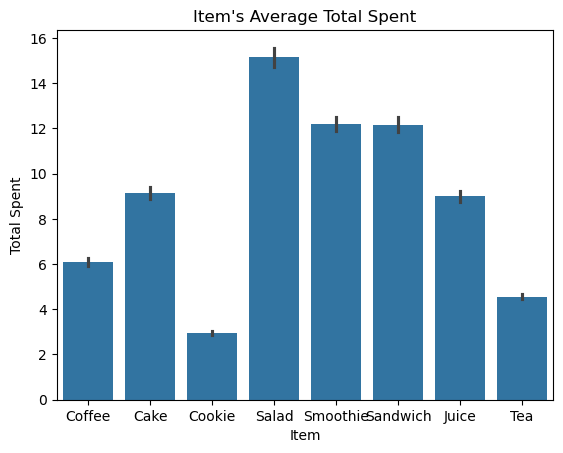

In [10]:
sns.barplot(data=df, x='Item', y='Total Spent')
plt.title("Item's Average Total Spent")
plt.show()

In [11]:
#Item's AVERAGE quantity
result = (
    df.groupby('Item', dropna=True)[['Quantity']]
      .mean() 
      .round(2)
      .sort_values(by='Quantity', ascending=False)
)
print(result)

          Quantity
Item              
Cake          3.05
Coffee        3.05
Smoothie      3.05
Sandwich      3.04
Tea           3.04
Salad         3.03
Juice         3.00
Cookie        2.97


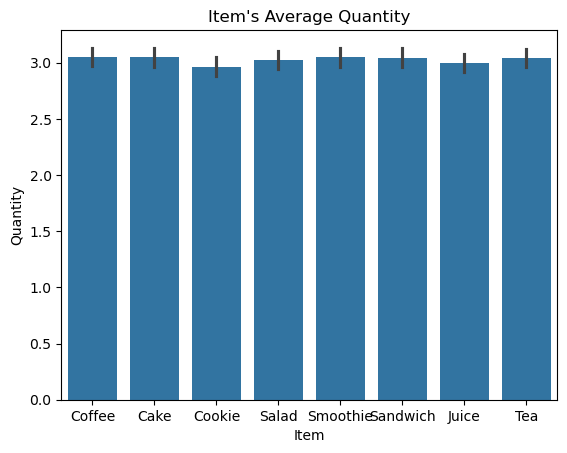

In [12]:
sns.barplot(data=df, x='Item', y='Quantity')
plt.title("Item's Average Quantity")
plt.show()

In [13]:
#Item's MAX quantity and total spent
result = (
    df.groupby('Item', dropna=True)[['Quantity','Total Spent']]
      .max()  
      .round(2)
      .sort_values(by='Total Spent', ascending=False)
)
print(result)

          Quantity  Total Spent
Item                           
Salad          5.0         25.0
Sandwich       5.0         20.0
Smoothie       5.0         20.0
Cake           5.0         15.0
Juice          5.0         15.0
Coffee         5.0         10.0
Tea            5.0          7.5
Cookie         5.0          5.0


# *Time-based Trends*

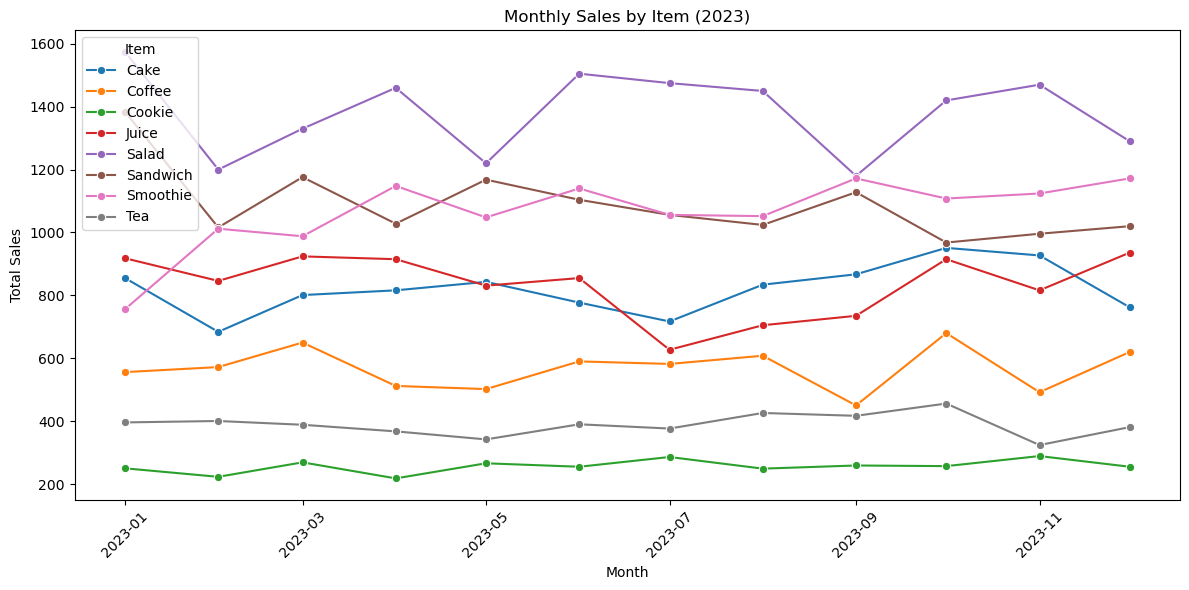

In [14]:
#Making sure Transaction Date is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

#Extracting Year-Month for grouping
df['YearMonth'] = df['Transaction Date'].dt.to_period('M').dt.to_timestamp()

#Grouping by YearMonth and Item, summing Total Spent
monthly_sales = (
    df.groupby(['YearMonth', 'Item'])['Total Spent']
    .sum()
    .reset_index()
    .rename(columns={'Total Spent': 'Monthly Total'})
)

#Sorting values for plotting
monthly_sales = monthly_sales.sort_values(by=['YearMonth', 'Item'])

#Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_sales,
    x='YearMonth', y='Monthly Total', hue='Item', marker='o'
)
#Adding labels and titles
plt.title('Monthly Sales by Item (2023)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Day with highest revenue in 2023:
Date             2023-07-24
Total Revenue         371.5
Name: 204, dtype: object


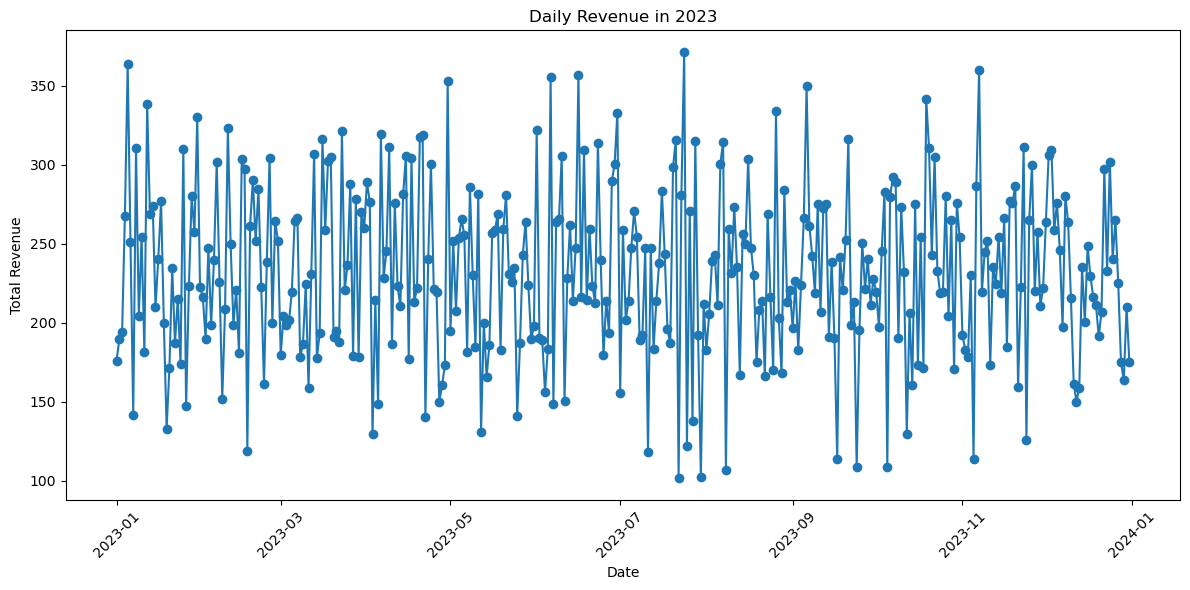

In [15]:
#Filtering for 2023 data only
df_2023 = df[df['Transaction Date'].dt.year == 2023]

#Group by date and sum Total Spent
daily_sales = (
    df_2023.groupby(df_2023['Transaction Date'].dt.date)['Total Spent']
    .sum()
    .reset_index()
    .rename(columns={'Transaction Date': 'Date', 'Total Spent': 'Total Revenue'})
)

#Finding the day with highest total revenue
highest_day = daily_sales.loc[daily_sales['Total Revenue'].idxmax()]

print("Day with highest revenue in 2023:")
print(highest_day)

#Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Revenue'], marker='o', linestyle='-')
plt.title("Daily Revenue in 2023")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# *Order Type Analysis*

Location
In-store    3017
Takeaway    3022
Name: Transaction ID, dtype: int64


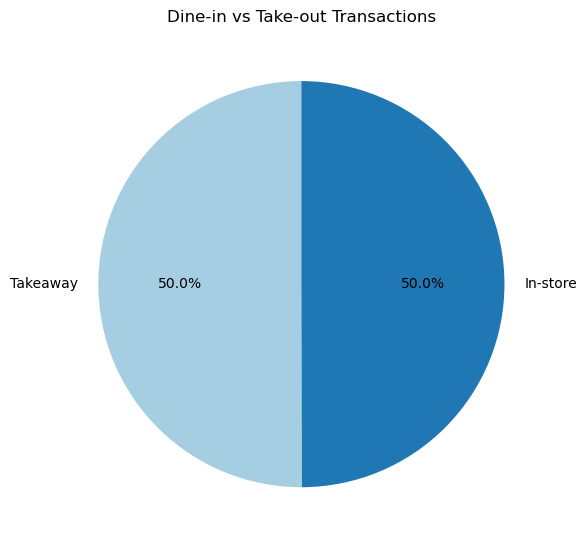

In [16]:
#Dine-in vs. Take-out transactions
dine_takeout_transactions = df.groupby('Location')['Transaction ID'].count()
print(dine_takeout_transactions)

# Plotting transactions by location
dine_take_counts = df['Location'].value_counts(dropna=True)

#Creating a pie chart
plt.figure(figsize=(6,6))
plt.pie(
    dine_take_counts,
    labels=dine_take_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Dine-in vs Take-out Transactions")
plt.tight_layout()
plt.show()


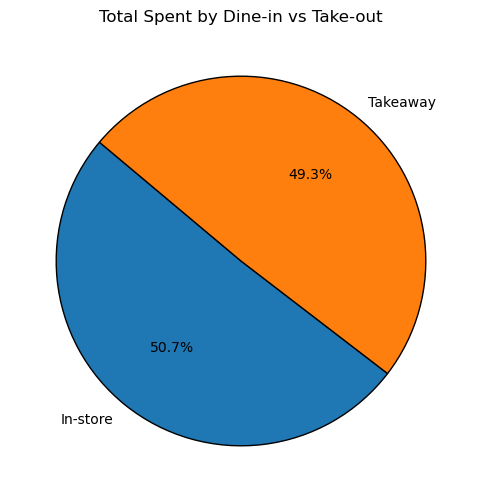

In [17]:
df_filtered = df.dropna(subset=['Location', 'Total Spent'])

#Grouping by Location and sum the Total Spent
total_spent_by_location = df_filtered.groupby('Location')['Total Spent'].sum()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_spent_by_location, labels=total_spent_by_location.index, 
        autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Total Spent by Dine-in vs Take-out')
plt.show()

# *Payment Method Insights*

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64


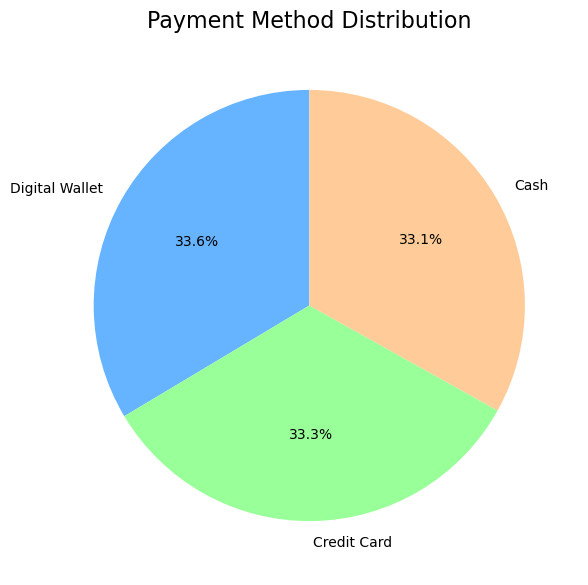

In [18]:
#Counting how many times each payment method appears
payment_counts = df['Payment Method'].value_counts()
print(payment_counts)

#Pie Chart
plt.figure(figsize=(7, 7))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title("Payment Method Distribution", fontsize=16)
plt.ylabel("")  # Hide y-label
plt.show()



Payment Method
Cash              9.060883
Credit Card       9.030987
Digital Wallet    8.945886
Name: Total Spent, dtype: float64


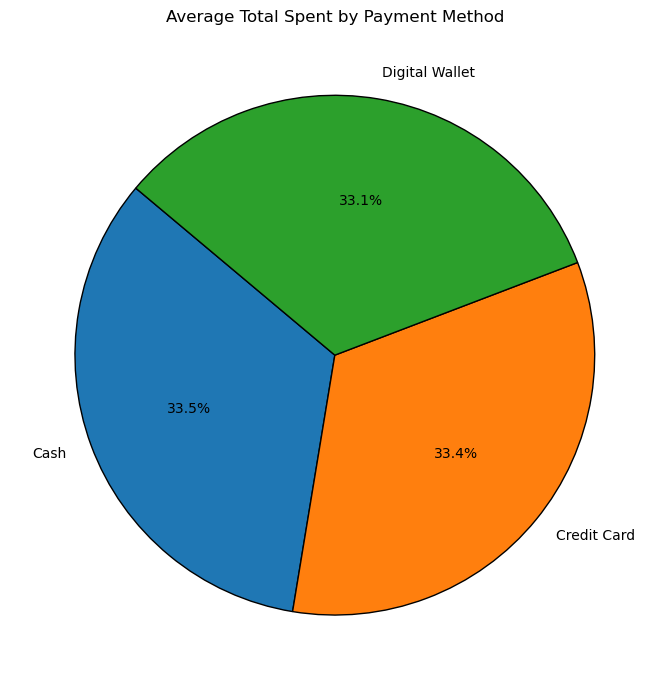

In [19]:
#Grouping by Payment Method and calculate average Total Spent
avg_total_spent_by_payment = df.groupby('Payment Method')['Total Spent'].mean()

#Sorting values for better readability
avg_total_spent_by_payment = avg_total_spent_by_payment.sort_values(ascending=False)

#Displaying the result
print(avg_total_spent_by_payment)

#Visualizing it as a pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    avg_total_spent_by_payment,
    labels=avg_total_spent_by_payment.index,
    autopct='%1.1f%%',      # Show percentages
    startangle=140,         # Rotate for better view
    wedgeprops={'edgecolor': 'black'} # Add borders
)

plt.title('Average Total Spent by Payment Method')
plt.tight_layout()
plt.show()

# *Item-level Insights*

          Quantity
Item              
Coffee      3536.0
Juice       3505.0
Salad       3469.0
Cake        3468.0
Sandwich    3429.0
Smoothie    3336.0
Tea         3307.0
Cookie      3232.0


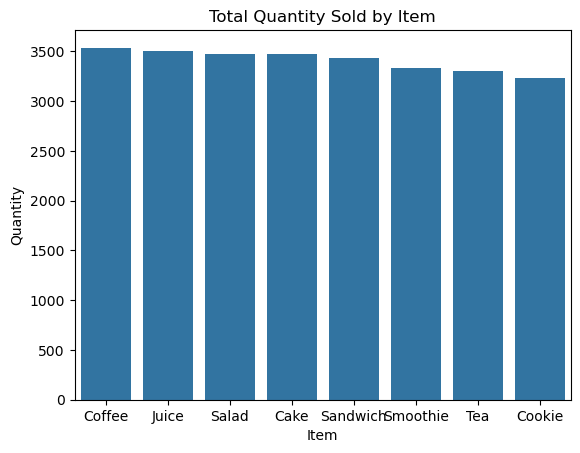

In [24]:
#Total quantity sold by Item
result = (
    df.groupby('Item', dropna=True)[['Quantity']]
      .sum() 
      .round(2)
      .sort_values(by='Quantity', ascending=False)
)
print(result)
sns.barplot(data=result, x='Item', y='Quantity')
plt.title("Total Quantity Sold by Item")
plt.show()